# **Proyecto final- Telco Costumer Churn**

Integrantes:
- Benjamín Benimelis
- Joel Figueroa
- Tomas Garrido
- Marcelo Lector
- Diego Maldonado
- Marcelo Ramirez

Curso:
- MAT281


## Indice
1. Definición del problema
2. Preparación  
3. Análisis exploratorio  
4. Visualización descriptiva  
5. Preprocesamiento  
6. Selección y comparación de modelos  
7. Evaluación de modelos  
8. Interpretación del modelo  
9. Conclusiones y recomendacione

##1. Definición del problema

###1.1 Introducción
- Para las empresas de telecomunicaciones es fundamental retener a los clientes y, al mismo tiempo, atraer nuevos. La cancelación del servicio por parte del cliente (Churn) genera un costo económico elevado, ya que adquirir nuevos clientes es más caro que retenerlos.


###1.2 Objetivo del análisis
- Constuir un modelo predictivo que permita anticipar qué clientes podrían dejar la empresa, además de detectar variables que expliquen el por qué de esta decisión

###1.3 Descripción del dataset
- El dataset utilizado será el "Telco Costumer Churn" de IBM, el cual contiene información de 7043 clientes y 21 columnas otorgando datos a cada uno.
- La ***columna objetivo*** "Churn" indica si un cliente abandonó el servicio en el ultimo mes.

#### 1.3.1 Atributos del dataset
- customerID – ID del cliente
- gender – Indica si el cliente es hombre o mujer
- SeniorCitizen – Indica si el cliente es adulto
mayor (1, 0)
- Partner – Indica si el cliente tiene pareja (Yes, No)
- Dependents – Indica si el cliente tiene dependientes (Yes, No)
- tenure – Número de meses que el cliente ha permanecido con la empresa
- PhoneService – Indica si el cliente tiene servicio telefónico (Yes, No)
- MultipleLines – Indica si el cliente tiene múltiples líneas (Yes, No, No phone service)
- InternetService – Proveedor de servicio de internet del cliente (DSL, Fiber optic, No)
- OnlineSecurity – Indica si el cliente tiene seguridad en línea (Yes, No, No internet service)
- OnlineBackup – Indica si el cliente tiene copia de seguridad en línea (Yes, No, No internet service)
- DeviceProtection – Indica si el cliente tiene protección de dispositivo (Yes, No, No internet service)
- TechSupport – Indica si el cliente tiene soporte técnico (Yes, No, No internet service)
- StreamingTV – Indica si el cliente tiene servicio de TV por streaming (Yes, No, No internet service)
- StreamingMovies – Indica si el cliente tiene servicio de películas en streaming (Yes, No, No internet service)
- Contract – Indica el tipo de contrato (Month-to-month, One year, Two year)
- PaperlessBilling – Indica si el cliente tiene facturación electrónica (Yes, No)
- PaymentMethod – Indica el método de pago (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges – Indica el costo mensual actual de la suscripción del cliente
- TotalCharges – Indica el total de cargos pagados por el cliente hasta ahora
- Churn – Indica si el cliente abandonó el servicio

##2. Preparación

###2.1 Imports y conexión a Google Drive

**Google Drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Librerias:**

In [ ]:
import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import randint, uniform

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
!pip install xgboost -q
from xgboost import XGBClassifier

!pip install imbalanced-learn -q
from imblearn.over_sampling import SMOTE

from sklearn.metrics import ConfusionMatrixDisplay


###2.2 Cargar dataset

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

## 3. Análisis Exploratorio

###3.1 Primer vistazo

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("N° filas, n° columnas:")
print(df.shape)
print("\nTipos de datos y nombre de columnas:")
print(df.info())

N° filas, n° columnas:
(7043, 21)

Tipos de datos y nombre de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract         

- Vemos que de las 21 columnas, 3 son númericas y 18 son tipo objeto.
- La columna *TotalCharges* aparece como tipo *object*, pero debe ser númerica.
- No hay datos nulos.

### 3.2 Estadisticas descriptivas generales

In [ ]:
print("Estadisticas de variables numéricas:")
print("\n",df.describe())

print("\nEstadisticas de variables categóricas:")
print("\n",df.describe(include='object'))

Estadisticas de variables numéricas:

        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Estadisticas de variables categóricas:

         customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043

- En las variables numéricas, notamos que solo el 16% de los clientes son adultos mayores. El promedio del cliente en la empresa es de aprox. 32 meses y el monto mensual de la suscripción del cliente tiene una media de 64 dolares.

- Para las variables categoricas, vemos que la mayoria de servicios adicionales no son contratados por los clientes, el contrato más frecuente es mes a mes (el cual podría ser razón de Churn) y TotalCharges aparece acá siendo que posee datos numericos, por lo cual requerirá limpieza.

- En la variable obteivo **Churn** tiene mayor frecuencia "No" con 5174 clientes, lo cual indica un desbalanceo por parte de esta, ya que la clase "No" tiene mayor frecuencia, y así el modelo podría aprender mal. (COMPLETAR)

###3.3 Distribuciones para las variables numéricas

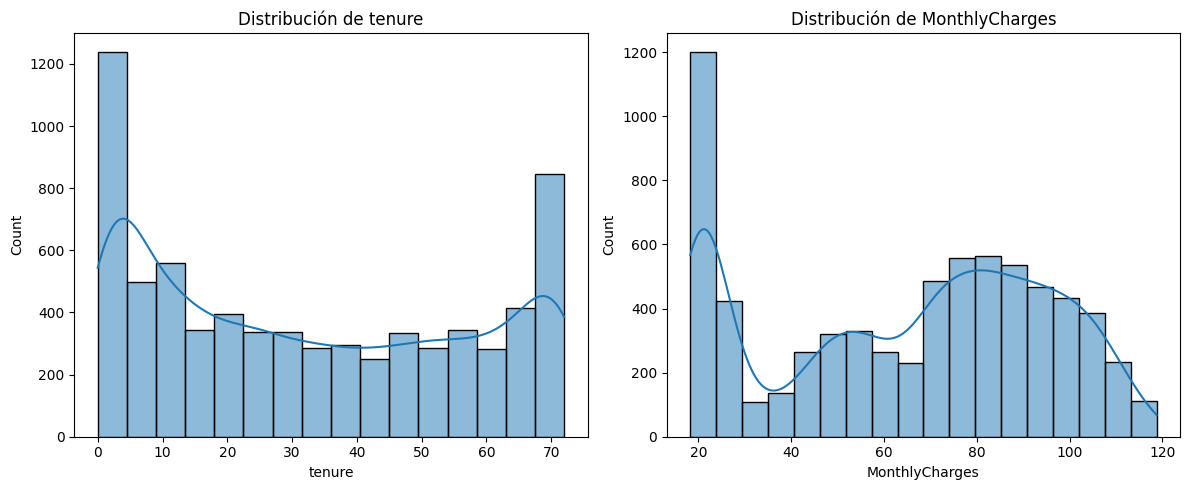

In [ ]:
num_cols = ['tenure', 'MonthlyCharges']

plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

- **tenure** tiene una distribución sesgada hacia la izquierda, lo que indica que muchos clientes llevan poco tiempo con la empresa, pero no sabemos si estos clientes *duraron* o *siguen* en la empresa.

- **MonthlyCharges** presenta más variabilidad, con muchos clientes pagando cerca de 70–90 USD al mes.

### 3.4 Correlación entre variables numéricas

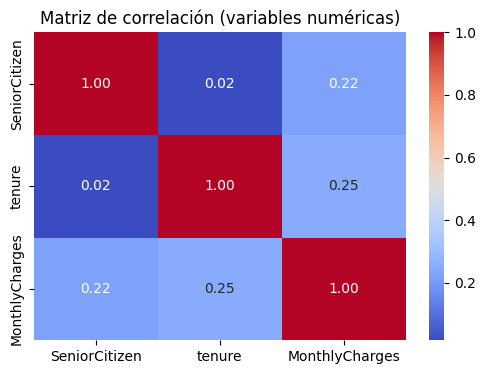

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['SeniorCitizen','tenure','MonthlyCharges']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

- SeniorCitizen vs tenure se tiene una correlación de 0.02, la cual es practicamente nula, por lo tanto los clientes mayores no tienden a quedarse ni más ni menos tiempo.
- SeniorCitizen vs MonthlyCharges tiene una correlación de 0.22, positiva débil, lo que indica una ligera tendencia en la que los clientes mayores pagan pagan cuotas un poco más altas.
- tenure vs MonthlyCharges tiene una correlación de 0.25, positiva debil, indicando que a medida que aumente la antiguedad del cliente, tiende a aumentar su cargo mensual.

## 4. Visualización descriptiva

### 4.1 Relación entre tenure y Churn

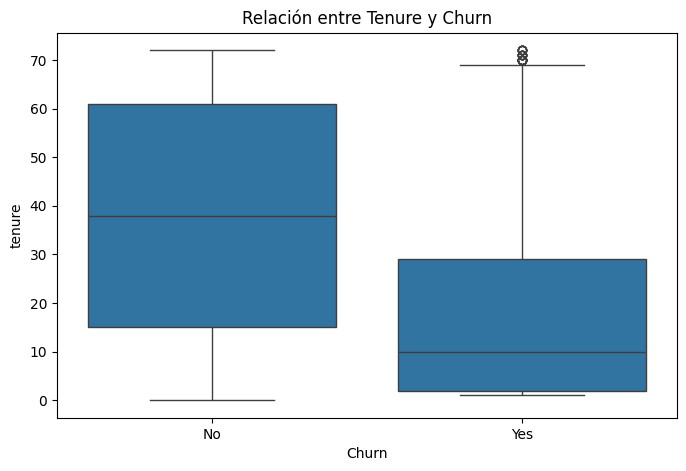

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Relación entre Tenure y Churn")
plt.show()

- Los clientes que abandonan tienen un promedio más bajo de meses, por lo que los clientes nuevos tienen una probabilidad más alta de irse.

### 4.2 Relación entre MonthlyCharges y Churn

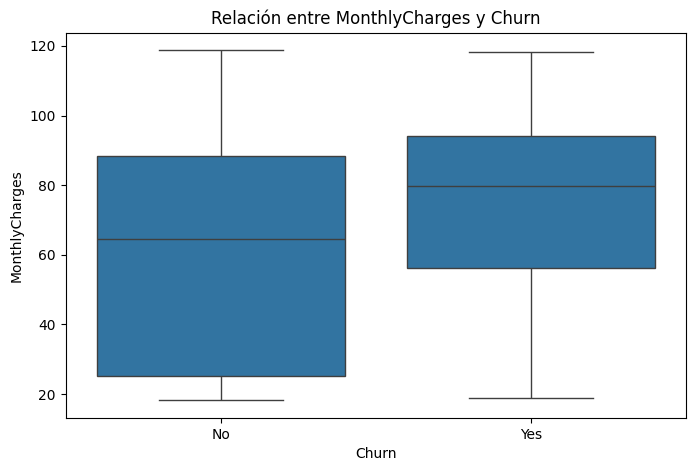

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Relación entre MonthlyCharges y Churn")
plt.show()

- En promedio, los clientes que abandonan tienden a tener un cargo mensual más alto, lo que puede indicar que los planes más caros producen abandonos

### 4.3 Tasa de churn por tipo de InternetService

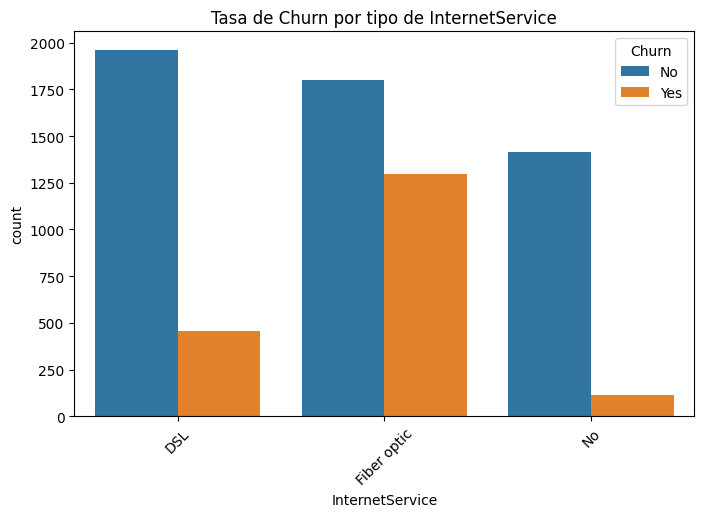

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Tasa de Churn por tipo de InternetService")
plt.xticks(rotation=45)
plt.show()

- Notamos que los clientes que no tienen un servicio de internet son los que menos abandonan la empresa, mientras que los que poseen fibra optica son los que más la abandonan, siendo la mayoria de los que poseen este servicio.

### 4.4 Relación entre TechSupport/OnlineSecurity y Churn

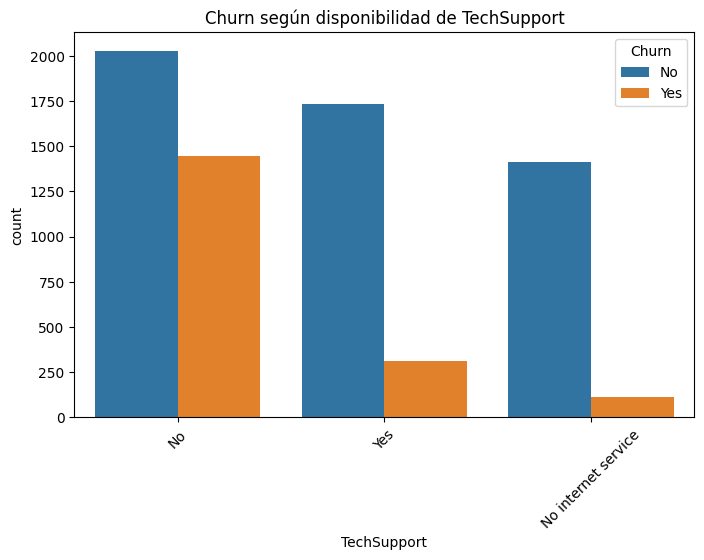

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title("Churn según disponibilidad de TechSupport")
plt.xticks(rotation=45)
plt.show()

- Los clientes que no tienen soporte técnico muestran una tasa de abandono mayor en comparación a quiernes poseen este servicio y quienes no tienen el servicio de internet. Esto sugiere que el soporte técnico contribuye de manera relevante a la retención, probablemente porque reduce problemas con el servicio.

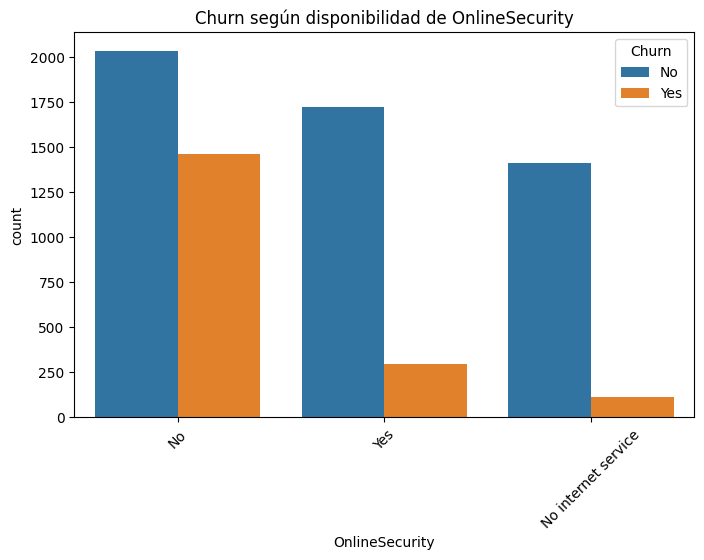

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.title("Churn según disponibilidad de OnlineSecurity")
plt.xticks(rotation=45)
plt.show()

- Los clientes sin seguridad online son los que más abandonan la empresa.
Los usuarios que sí cuentan con seguridad en línea tienen una menor probabilidad de abandono, lo que indica que ofrecer servicios adicionales de protección aumenta la fidelización del cliente.

### 4.5 Relación de PaymentMethod y Churn

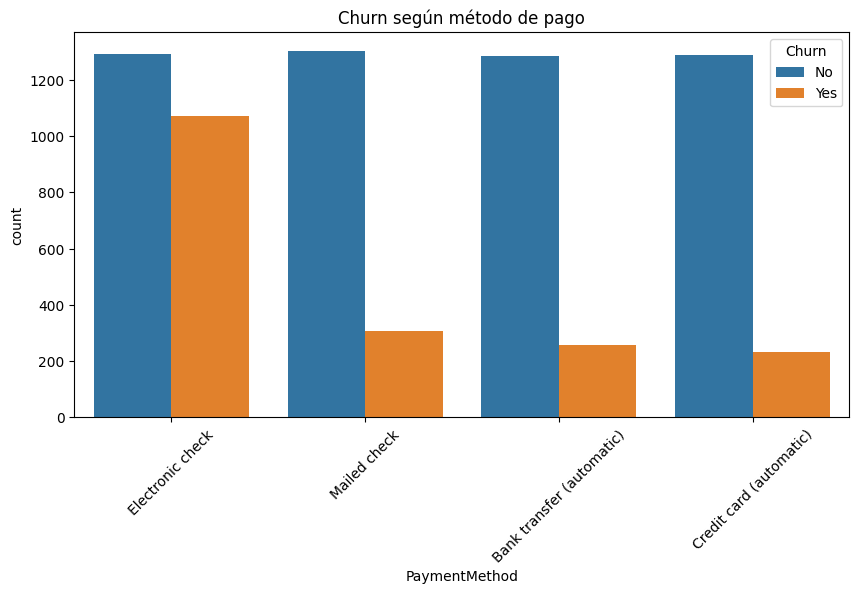

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn según método de pago")
plt.xticks(rotation=45)
plt.show()

- Los clientes que usan Electronic check muestran la tasa de churn más alta.

- Los clientes con pagos automáticos (Bank transfer o Credit card automatic) presentan menores tasas de abandono.

- Esto indica que los métodos de pago automáticos pueden ayudar a retener clientes, mientras que los pagos manuales (especialmente por cheque electrónico) están asociados a un mayor riesgo de churn

## 5. Preprocesamiento

### 5.1 Limpieza de Datos

In [ ]:
df_clean = df.copy()
df_clean = df_clean.drop('customerID', axis=1)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median())
df_clean.info()
display(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Se detectaron 11 valores faltantes en TotalCharges, los cuales fueron convertidos a numéricos y posteriormente imputados usando la mediana para mantener la consistencia del valor típico de la distribución.

### 5.2 Codificación de variables

In [ ]:
df_clean['Churn'] = df_clean['Churn'].replace({'Yes': 1, 'No': 0})
df_clean.head()

/tmp/ipython-input-136692589.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Churn'] = df_clean['Churn'].replace({'Yes': 1, 'No': 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


- Se transformó la variable objetivo Churn de Yes/No a 1/0.
El resto de las variables categóricas, incluyendo aquellas con valores Yes/No, se codificaron posteriormente mediante One-Hot Encoding.

### 5.3 División de Datos

In [ ]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(X_train.shape)
print(X_test.shape)

(5634, 19)
(1409, 19)


- Se dividió el dataset en entrenamiento (80%) y prueba (20%) estratificando por la variable 'Churn' para mantener la proporción original de cancelaciones. Esto asegura una evaluación justa y evita el sobreajuste al probar con datos no vistos.


### 5.4 Escalonado y Balanceo

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in X_train.columns if col not in num_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_proc, y_train)

print(f"Dimensiones Train (Balanceado): {X_train_res.shape}")
print(f"Distribución Target:\n{y_train_res.value_counts()}")

Dimensiones Train (Balanceado): (8278, 46)
Distribución Target:
Churn
0    4139
1    4139
Name: count, dtype: int64


- Se aplicó estandarización a las variables numéricas, ya que modelos como regresión logística, SVM y KNN dependen de la escala de los datos para un desempeño adecuado. La variable Churn presenta un desbalance significativo (~73% No vs 27% Yes), por lo que se utilizó SMOTE para generar nuevas muestras sintéticas de la clase minoritaria únicamente en el conjunto de entrenamiento.

## 6. Selección y Comparación de Modelos

En esta etapa, entrenaremos y compararemos cinco modelos de clasificación supervisada para predecir la fuga de clientes (Churn):

1.  **Logistic Regression (Regresión Logística)**: Modelo lineal base, útil para interpretación.
2.  **K-Nearest Neighbors (KNN)**: Modelo basado en instancias y distancia.
3.  **Support Vector Machine (SVM)**: Eficaz en espacios de alta dimensión.
4.  **Random Forest**: Ensamble de árboles de decisión (Bagging), robusto y preciso.
5.  **XGBoost**: Ensamble de boosting, generalmente el estado del arte en datos tabulares.

Para esta parte del proyecto probamos cinco modelos distintos. En tres de ellos —SVM, Random Forest y XGBoost— buscamos automáticamente los mejores parámetros usando validación cruzada con 3 divisiones del conjunto de entrenamiento (cv=3). Esto nos permite elegir configuraciones que funcionen mejor sin probarlas manualmente.

Los modelos Logistic Regression y KNN se usaron como referencia, por lo que se entrenaron con sus parámetros normales.

Luego comparamos todos los modelos usando las mismas métricas y elegimos el mejor según su capacidad para distinguir entre clientes que se van y los que se quedan (medida con ROC-AUC), ya que es la métrica más adecuada cuando las clases están desbalanceadas.


### 6.1 Ejecución del Entrenamiento y Ajuste de Hiperparámetros

A continuación, ejecutamos el ciclo de entrenamiento. Para cada algoritmo:
1.  Verificamos si tiene una grilla de parámetros definida.
2.  Si la tiene, aplicamos `GridSearchCV` para encontrar la mejor combinación.
3.  Si no, entrenamos el modelo con sus parámetros por defecto.
4.  Calculamos la precisión (Accuracy) tanto en la validación cruzada como en el conjunto de prueba para detectar posible sobreajuste.
5.  Medimos el tiempo de ejecución para evaluar la eficiencia.

In [ ]:
RANDOM_STATE = 42
CV = 3
N_ITER = 10
RS_N_JOBS = -1

cv_splitter = StratifiedKFold(n_splits=CV, shuffle=True, random_state=RANDOM_STATE)

base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=RANDOM_STATE, n_jobs=1)
}

param_dists = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': randint(50, 200),
        'max_depth': randint(5, 20),
        'min_samples_split': randint(2, 10)
    },
    'XGBoost': {
        'n_estimators': randint(50, 200),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 8),
        'subsample': [0.7, 0.9, 1.0]
    }
}

def _is_grid(param_dict):
    for v in param_dict.values():
        if hasattr(v, "rvs"): return False
    return True

results = []
best_estimators = {}

print("Iniciando entrenamiento optimizado por ROC-AUC...")

for name, estimator in base_models.items():
    start = time.time()
    dist = param_dists.get(name, {})

    if dist:
        if _is_grid(dist):
            searcher = GridSearchCV(
                estimator, param_grid=dist,
                scoring='roc_auc',
                cv=cv_splitter, n_jobs=RS_N_JOBS, verbose=1
            )
        else:
            searcher = RandomizedSearchCV(
                estimator, param_distributions=dist,
                n_iter=N_ITER, scoring='roc_auc',
                cv=cv_splitter, n_jobs=RS_N_JOBS, random_state=RANDOM_STATE, verbose=1
            )

        searcher.fit(X_train_res, y_train_res)
        best_model = searcher.best_estimator_
        best_cv_score = searcher.best_score_
        best_params = searcher.best_params_

    else:
        best_model = estimator
        best_model.fit(X_train_res, y_train_res)
        cv_scores = cross_val_score(best_model, X_train_res, y_train_res, cv=cv_splitter, scoring='roc_auc', n_jobs=RS_N_JOBS)
        best_cv_score = cv_scores.mean()
        best_params = "default"

    elapsed = time.time() - start
    best_estimators[name] = best_model

    y_pred = best_model.predict(X_test_proc)
    y_proba = best_model.predict_proba(X_test_proc)[:, 1] if hasattr(best_model, "predict_proba") else y_pred

    test_roc = roc_auc_score(y_test, y_proba)
    test_acc = accuracy_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)

    results.append({
        'Model': name,
        'CV ROC-AUC': best_cv_score,
        'Test ROC-AUC': test_roc,
        'Test Recall': test_recall,
        'Test Accuracy': test_acc,
        'Time (s)': round(elapsed, 1)
    })

    print(f"{name} terminado. CV ROC-AUC: {best_cv_score:.4f}")

results_df = pd.DataFrame(results).sort_values(by='Test ROC-AUC', ascending=False)
print("\n--- Ranking de Modelos (Ordenado por ROC-AUC) ---")
display(results_df)

best_model_name = results_df.iloc[0]['Model']
best_final_model = best_estimators[best_model_name]
print(f"\n MODELO GANADOR: {best_model_name}")

Iniciando entrenamiento optimizado por ROC-AUC...
Logistic Regression terminado. CV ROC-AUC: 0.8538
KNN terminado. CV ROC-AUC: 0.8579
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM terminado. CV ROC-AUC: 0.9097
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest terminado. CV ROC-AUC: 0.9216
Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGBoost terminado. CV ROC-AUC: 0.9334

--- Ranking de Modelos (Ordenado por ROC-AUC) ---


,Model,CV ROC-AUC,Test ROC-AUC,Test Recall,Test Accuracy,Time (s)
0,Logistic Regression,0.853755,0.839761,0.796791,0.736693,2.8
4,XGBoost,0.933401,0.838788,0.612299,0.786373,20.4
3,Random Forest,0.921607,0.821676,0.588235,0.771469,26.2
2,SVM,0.909664,0.799783,0.673797,0.762243,418.4
1,KNN,0.857905,0.768407,0.703209,0.696238,0.5



 MODELO GANADOR: Logistic Regression


### 6.2 Análisis de los Resultados

Una vez finalizado el entrenamiento, recopilamos las métricas de rendimiento para identificar el mejor modelo. La siguiente tabla muestra el puntaje de validación cruzada (Best CV Score), el puntaje en el conjunto de prueba (Test Score) y el tiempo de entrenamiento para cada algoritmo.

El modelo con el mejor rendimiento será seleccionado para la siguiente fase de evaluación detallada.

In [ ]:
results_df = pd.DataFrame(results).sort_values(
    by='Test ROC-AUC',
    ascending=False
).reset_index(drop=True)

print("\n--- Resultados de validación cruzada y test ---")
display(results_df)

best_model_name = results_df.loc[0, 'Model']
best_model = best_estimators[best_model_name]

print(f"\n MEJOR MODELO: {best_model_name}")
print(f"CV ROC-AUC:   {results_df.loc[0, 'CV ROC-AUC']:.4f}")
print(f"Test ROC-AUC: {results_df.loc[0, 'Test ROC-AUC']:.4f}")
print(f"Test Accuracy: {results_df.loc[0, 'Test Accuracy']:.4f}")


--- Resultados de validación cruzada y test ---


,Model,CV ROC-AUC,Test ROC-AUC,Test Recall,Test Accuracy,Time (s)
0,Logistic Regression,0.853755,0.839761,0.796791,0.736693,2.8
1,XGBoost,0.933401,0.838788,0.612299,0.786373,20.4
2,Random Forest,0.921607,0.821676,0.588235,0.771469,26.2
3,SVM,0.909664,0.799783,0.673797,0.762243,418.4
4,KNN,0.857905,0.768407,0.703209,0.696238,0.5



 MEJOR MODELO: Logistic Regression
CV ROC-AUC:   0.8538
Test ROC-AUC: 0.8398
Test Accuracy: 0.7367


## 7. Evaluación de Modelos

A continuación, se presentan las métricas de rendimiento del modelo seleccionado en el conjunto de prueba. Se utiliza el **reporte de clasificación** para observar la precisión, recall y f1-score de cada clase, y el puntaje **ROC-AUC** para medir la capacidad de distinción global del modelo.

In [ ]:
y_pred = best_model.predict(X_test_proc)
y_pred_proba = best_model.predict_proba(X_test_proc)[:, 1]

In [ ]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("-" * 30)
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

------------------------------
ROC-AUC Score: 0.8398


###7.1 Visualización de Resultados

A continuación, se grafican la **Matriz de Confusión** y la **Curva ROC**.

* **Matriz de Confusión:** Permite identificar cuántos clientes fueron clasificados correctamente y qué tipo de errores comete el modelo (falsos positivos vs. falsos negativos).
* **Curva ROC:** Muestra la relación entre la tasa de verdaderos positivos y falsos positivos. Un área bajo la curva (AUC) cercana a 1 indica un modelo excelente.

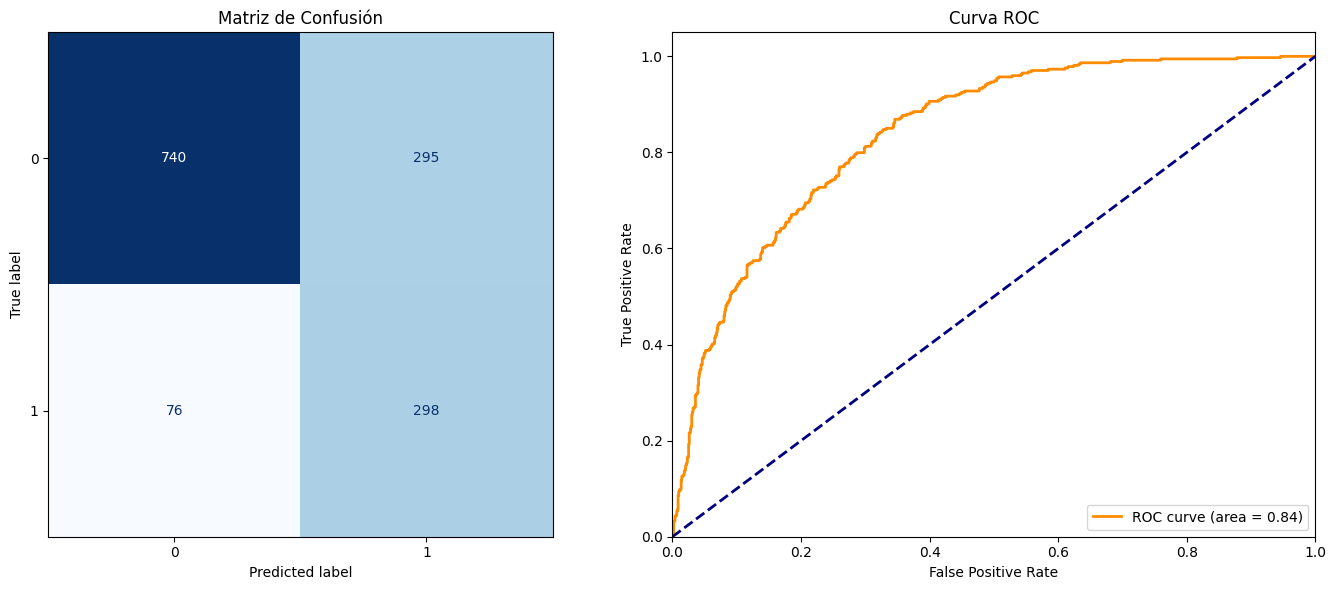

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Matriz de Confusión')

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Curva ROC')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## 8. Interpretación del modelo
En las secciones anteriores se construyó un pipeline de modelamiento para predecir la probabilidad de churn de los clientes, se compararon distintos clasificadores y se seleccionó un modelo de referencia.

En esta sección se busca interpretar el comportamiento del modelo seleccionado desde dos perspectivas complementarias:

- **Perspectiva estadística/modelo:** analizar qué tan bien distingue entre clientes que se dan de baja y los que se mantienen, y cómo se refleja esto en métricas como accuracy, recall y ROC-AUC.
- **Perspectiva de negocio:** identificar qué características de los clientes y de los servicios contratados se asocian a un mayor o menor riesgo de churn, y qué implicancias tienen estos resultados para diseñar estrategias de retención.

De esta forma, la interpretación del modelo permite pasar desde un resultado puramente predictivo a una herramienta que entrega información accionable para la toma de decisiones.



### 8.1 Recordatorio del modelo seleccionado

En las secciones anteriores se compararon distintos modelos de clasificación para predecir la probabilidad de churn de los clientes, utilizando como variable objetivo `Churn` (1 = cliente que se da de baja, 0 = cliente que se mantiene).

El pipeline de modelamiento consideró los siguientes pasos:

- Estandarización de las variables numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`).
- Codificación one-hot de las variables categóricas.
- Balanceo de la clase minoritaria mediante **SMOTE**, aplicado únicamente sobre el conjunto de entrenamiento.
- Entrenamiento y comparación de varios modelos (Regresión Logística, KNN, SVM, Random Forest y XGBoost) usando validación cruzada estratificada y **ROC-AUC** como métrica principal de selección.

A partir de esta comparación, el modelo seleccionado fue una **Regresión Logística**, ya que logró un buen equilibrio entre capacidad predictiva, interpretabilidad y costo computacional. En el conjunto de prueba, este modelo obtuvo, aproximadamente, las siguientes métricas:

- **Accuracy:** ~0.74  
- **Recall para la clase churn (1):** ~0.80  
- **Precision para la clase churn (1):** ~0.50  
- **ROC-AUC:** ~0.84  

En otras palabras, el modelo es capaz de diferenciar entre clientes que se darán de baja y clientes que se mantendrán, priorizando la **detección de clientes en riesgo**.






### 8.2 Interpretación de las métricas de evaluación

A continuación se interpreta cada una de las métricas del problema.

**Accuracy:**  
La accuracy corresponde a la proporción de predicciones correctas sobre el total de observaciones del conjunto de prueba. Un valor cercano a 0.74 indica que, en promedio, el modelo clasifica correctamente alrededor del 74% de los clientes (tanto los que hacen churn como los que se mantienen). Si bien es una medida global, en problemas desbalanceados como este no es suficiente por sí sola, ya que puede ocultar un mal desempeño en la clase minoritaria (churn).

**Recall para la clase churn (1):**  
El recall mide la capacidad del modelo para detectar correctamente a los clientes que efectivamente harán churn. Un recall cercano a 0.80 implica que, de cada 100 clientes que se dan de baja, el modelo logra identificar aproximadamente a 80 como clientes en riesgo. Desde el punto de vista del negocio, esto es relevante porque reducir la cantidad de falsos negativos (clientes que se van y el modelo no marca como riesgo) es clave para una estrategia de retención.

**Precision para la clase churn (1):**  
La precision indica, entre todos los clientes que el modelo clasifica como “churn”, qué proporción realmente se da de baja. Un valor cercano a 0.50 significa que, aproximadamente, la mitad de los clientes marcados como en riesgo efectivamente harán churn, mientras que la otra mitad corresponde a falsos positivos. En otras palabras, el modelo tiende a “sobremarcar” algunos clientes como de alto riesgo, lo que es coherente con la decisión de priorizar el recall: se prefiere captar a la mayoría de los clientes que se van, aun a costa de intervenir también a algunos que finalmente se quedan.

**ROC-AUC:**  
La métrica ROC-AUC resume la capacidad global del modelo para distinguir entre clientes que harán churn y clientes que no lo harán, considerando todos los posibles umbrales de decisión. Un valor cercano a 0.84 indica un desempeño discriminatorio bueno: si se toma al azar un cliente que hace churn y uno que no, el modelo asigna, en promedio, una probabilidad de churn mayor al cliente que efectivamente se da de baja en aproximadamente el 84% de los casos.

En conjunto, estas métricas muestran que el modelo logra un equilibrio razonable entre rendimiento global y detección de clientes en riesgo, con un énfasis claro en **reducir los falsos negativos** (alto recall en la clase 1) a costa de aceptar una cantidad moderada de falsos positivos, lo que resulta consistente con el objetivo de apoyar campañas de retención preventiva.


### 8.3 Interpretación de las variables explicativas

El modelo final es una **Regresión Logística** entrenada sobre variables numéricas estandarizadas (`tenure`, `MonthlyCharges`, `TotalCharges`) y variables categóricas codificadas mediante *one-hot encoding* (por ejemplo, `InternetService`, `TechSupport`, `OnlineSecurity`, `PaymentMethod`, etc.).

En este tipo de modelo, cada coeficiente mide cómo cambia la **razón de odds** de churn al modificar una variable (o pasar de una categoría a otra), manteniendo el resto constante. En términos cualitativos:

- Coeficientes **positivos** se asocian a un **aumento** en el riesgo de churn.
- Coeficientes **negativos** se asocian a una **disminución** en el riesgo de churn.

Si bien el modelo trabaja internamente con variables transformadas y dummies, las relaciones que captura son coherentes con los patrones que se observaron en la etapa de análisis exploratorio (sección 4). A continuación se resumen los factores más relevantes.



#### 8.3.1 Tenure y cargos mensuales

En los boxplots de la sección 4 se observó que:

- Los clientes que hicieron **churn** tienen, en promedio, **menos meses de permanencia** (`tenure` más bajo) que los clientes que se quedan. Es decir, los clientes más “nuevos” aparecen sobrerrepresentados en la clase de abandono.
- Los clientes que abandonan tienden a tener **cargos mensuales más altos** (`MonthlyCharges`), lo que sugiere que los planes más caros están más expuestos a pérdida de clientes.

La Regresión Logística incorpora exactamente estas señales:

- Valores **bajos** de `tenure` contribuyen a aumentar la probabilidad predicha de churn, mientras que una mayor antigüedad actúa como factor protector.
- Valores **altos** de `MonthlyCharges` empujan la probabilidad hacia la clase 1 (churn), lo que es coherente con la idea de que precios más elevados pueden gatillar la decisión de cambio de proveedor.

En conjunto, el modelo considera como más riesgosos a clientes relativamente recientes y con cargos mensuales elevados.



#### 8.3.2 Tipo de servicio de internet y servicios complementarios

Los gráficos de la sección 4 muestran que el tipo de servicio y la presencia de servicios adicionales influyen en la tasa de churn:

- Para `InternetService`, algunas categorías exhiben proporciones de churn más altas que otras, lo que indica que la tecnología o el tipo de conexión también juega un rol en la decisión de baja.
- En `TechSupport`, los clientes **sin soporte técnico** presentan una tasa de abandono claramente superior a la de quienes sí cuentan con soporte.
- En `OnlineSecurity`, ocurre algo similar: los clientes **sin seguridad en línea** concentran una mayor proporción de churn, mientras que quienes tienen este servicio adicional muestran una mayor retención.

El modelo de Regresión Logística traduce estas diferencias en coeficientes para las dummies correspondientes:

- No disponer de **soporte técnico** (`TechSupport=No`) contribuye a aumentar los odds de churn.
- No tener **seguridad en línea** (`OnlineSecurity=No`) también se asocia a mayor probabilidad de baja.
- Determinados tipos de `InternetService` que en los gráficos mostraban más churn quedan penalizados en la combinación lineal del modelo, lo que hace que esos perfiles reciban una probabilidad predicha más alta.

De esta forma, el modelo captura que la ausencia de servicios de valor agregado (soporte, seguridad) está ligada a un mayor riesgo de abandono.




#### 8.3.3 Método de pago

En la sección 4.5 se analizó la relación entre `PaymentMethod` y churn, observándose que:

- Los clientes que pagan mediante **Electronic check** son los que presentan la **tasa de churn más alta**.
- En cambio, quienes utilizan **pagos automáticos** (por ejemplo, *Bank transfer automatic* o *Credit card automatic*) tienen tasas de abandono claramente menores.

Estas diferencias se reflejan en el modelo a través de las dummies de `PaymentMethod`:

- Estar en la categoría **Electronic check** aumenta la razón de odds de churn respecto de las categorías de referencia.
- Estar en categorías de **pago automático** reduce la probabilidad estimada de baja, funcionando como un factor protector.

Desde el punto de vista del modelo, el método de pago es una señal importante sobre el compromiso del cliente: quienes automatizan sus pagos tienden a ser más estables, mientras que los que pagan por cheque electrónico aparecen como un segmento más volátil.



#### 8.3.4 Perfil de cliente en alto y bajo riesgo

Combinando estas variables, el modelo identifica perfiles característicos:

- **Cliente en alto riesgo de churn** (alta probabilidad predicha):
  - Poca permanencia en la empresa (`tenure` bajo).
  - Cargos mensuales relativamente elevados (`MonthlyCharges` altos).
  - Ausencia de servicios complementarios como `TechSupport` y `OnlineSecurity`.
  - Uso de método de pago no automático, en particular `Electronic check`.

- **Cliente en bajo riesgo de churn** (baja probabilidad predicha):
  - Mayor antigüedad (`tenure` alto).
  - Cargos mensuales moderados.
  - Presencia de servicios de soporte y seguridad (`TechSupport=Yes`, `OnlineSecurity=Yes`).
  - Uso de pagos automáticos (`Bank transfer automatic`, `Credit card automatic`).

En resumen, la Regresión Logística no solo logra una buena capacidad predictiva, sino que además es consistente con las relaciones observadas en los datos: los coeficientes del modelo refuerzan la idea de que la permanencia, el nivel de cargos mensuales, la presencia de servicios adicionales y el método de pago son factores clave para explicar la probabilidad de churn en este conjunto de clientes.

### 8.4 Implicancias para la toma de decisiones

La interpretación del modelo permite pasar desde un resultado meramente predictivo a una herramienta de apoyo a la gestión de clientes. A partir de los patrones identificados en la Regresión Logística, se pueden extraer varias implicancias prácticas para el diseño de estrategias de retención.

**1. Priorización de clientes en riesgo**

El modelo entrega, para cada cliente, una **probabilidad estimada de churn**. Esto permite:

- Construir un **ranking de clientes en riesgo**, ordenados de mayor a menor probabilidad de baja.
- Definir un **umbral de intervención** (por ejemplo, contactar a todos los clientes cuya probabilidad supere cierto valor), ajustándolo según los recursos disponibles y el costo de las campañas.

Dado que el modelo presenta un **recall alto** para la clase churn, se puede utilizar como una primera capa de filtrado para focalizar los esfuerzos comerciales en aquellos clientes con mayor probabilidad de abandonar el servicio.

**2. Segmentos prioritarios para campañas de retención**

El perfil de “alto riesgo” que emerge del modelo sugiere segmentos concretos sobre los que conviene actuar de manera preventiva:

- Clientes con **baja antigüedad** (`tenure` bajo).
- Clientes con **cargos mensuales altos** (`MonthlyCharges` elevados).
- Clientes **sin servicios complementarios** como `TechSupport` u `OnlineSecurity`.
- Clientes que pagan mediante **Electronic check** u otros métodos no automáticos.

Sobre estos grupos se podrían diseñar campañas específicas, por ejemplo:

- Ofertas de **descuento temporal** o ajuste de plan para clientes con cargos mensuales altos.
- Programas de **onboarding y acompañamiento** para clientes nuevos, con foco en los primeros meses.
- Paquetes que integren **servicios de soporte o seguridad** a un costo atractivo para reforzar la percepción de valor.
- Incentivos para migrar a **métodos de pago automáticos**, que se asocian a menor probabilidad de churn.

**3. Ajuste del umbral según el costo de los errores**

Debido a que el modelo tiende a privilegiar el recall (es decir, “prefiere” cometer falsos positivos antes que falsos negativos), la elección del umbral de decisión debe considerar el costo relativo de:

- **Falsos negativos:** clientes que se van y que el modelo no marcó como riesgo (oportunidades de retención perdidas).
- **Falsos positivos:** clientes que el modelo marca como en riesgo, pero que en realidad se iban a quedar (acciones comerciales “innecesarias”).

En contextos donde perder un cliente es muy costoso, puede ser razonable **bajar el umbral** para capturar más churn potencial, aceptando intervenir también a algunos clientes que finalmente no abandonan. Si, por el contrario, las acciones de retención son muy caras, podría optarse por un umbral más estricto.

**4. Uso del modelo como herramienta de monitoreo**

Finalmente, el modelo puede integrarse en un proceso de monitoreo periódico:

- Recalcular la probabilidad de churn de manera regular (por ejemplo, mensual).
- Detectar **cambios en el perfil de riesgo** de cada cliente (por ejemplo, aumentos bruscos en la probabilidad estimada).
- Evaluar si las **campañas de retención** están logrando reducir la tasa de churn en los segmentos donde el modelo identifica mayor riesgo.

En resumen, la información entregada por la Regresión Logística no solo permite identificar qué clientes tienen más probabilidad de abandonar, sino también **por qué** están en riesgo, lo que facilita el diseño de estrategias de retención más focalizadas y eficientes.


##9. Conclusiones y recomendaciones

- Se abordó y analizó el problema sobre fuga de clientes (Churn), reconociendo el costo asociado a la adquisición de nuevos clientes y retencipon de los existentes. También se construyó un modelo capaz de predecir el comportamiento de cada consumidor y, al mismo tiempo, desentrañar los factores subyacentes que impulsan esta decisión, proporcionando así información accionable para estrategias de retención.



### 9.1 Metodología
- Se realizó un examen del dataset "Telco Customer Churn", mostrando la estructura de los datos, identificando la necesidad de tratar la columna TotalCharges y observando un desbalanceo significativo en la variable objetivo Churn. Las visualizaciones descriptivas destacaron patrones clave: la menor permanencia, los cargos mensuales más altos, la ausencia de servicios de valor agregado (como soporte técnico o seguridad en línea), y ciertos métodos de pago como fuertes predictores de churn.



###9.2 Preprocesamiento de datos
- Se Incluyó la eliminación del customerID, la conversión y manejo de valores nulos en TotalCharges, la codificación de la variable objetivo Churn (Yes/No a 1/0), la división estratificada de los datos en conjuntos de entrenamiento y prueba, la estandarización de variables numéricas, la codificación One-Hot para variables categóricas, y la aplicación de SMOTE en el conjunto de entrenamiento para mitigar el impacto del desbalanceo de clases.



###9.3 Selección y comparación de modelos
- Se evaluaron diversos modelos de clasificación (Regresión Logística, KNN, SVM, Random Forest, XGBoost) mediante GridSearchCV o RandomizedSearchCV con validación cruzada estratificada (cv=3). La métrica principal de optimización y selección fue el ROC-AUC. Tras esta rigurosa comparación, el modelo de Regresión Logística fue seleccionado por su sólido desempeño, su interpretabilidad y su eficiencia computacional.



###9.4 Resultados de regresión logistica
El modelo final de Regresión Logística, evaluado sobre el conjunto de prueba, demostró las siguientes métricas:



*   Accuracy: Aproximadamente 0.74.
*   Recall para la clase Churn (1): Aproximadamente 0.80.
*   Precision para la clase Churn (1): Aproximadamente 0.50.
*   ROC-AUC: Aproximadamente 0.84.

Estas métricas indican que el modelo es bastante bueno para distinguir entre clientes que se quedan y clientes que se van. El alto recall para la clase churn es particularmente importante, ya que significa que el modelo es capaz de identificar correctamente a 8 de cada 10 clientes que finalmente abandonan, lo cual es crucial para intervenciones proactivas de retención. Aunque la precisión es moderada, la prioridad de minimizar los falsos negativos (clientes que se van sin ser detectados) se alinea con los objetivos de negocio.



###9.5 Recomendaciones
Se puede hacer algunas mejoras a la plataforma para retener a los clientes por una mayor cantidad de tiempo:
* Se recomienda implementar programas de onboarding y acompañamiento proactivo durante los primeros meses. Esto podría incluir tutoriales, llamadas de seguimiento, ofertas exclusivas para nuevos usuarios o atención prioritaria para resolver dudas iniciales. El objetivo es reforzar el valor del servicio desde el principio y fomentar una conexión más profunda con la empresa.
* La falta de servicios como TechSupport (soporte técnico) y OnlineSecurity (seguridad en línea) es algo esencial para mantener una buena relación con los clientes. Esto puede ser mediante pruebas gratuitas, descuentos iniciales, integración de paquetes (numerosos servicioes en uno) o eduación al cliente.
* También puede haber un monitoreo continuo y acciones proactivas. Esto sería identificando y priorizar a los clientes de alto riesgo, diseñar campañas de retencion personalizadas, evaluar su correspondiente efectividad, entre otros.